The first step is creating a dictionary of mesh term -> mesh tree category because we want to focus on the "C" (diseases). 

In [6]:
import glob
import pandas as pd

meshtree_files = glob.glob('../data/mesh/*')
meshtree_files

['../data/mesh/mtrees1997.bin',
 '../data/mesh/mtrees2008.bin',
 '../data/mesh/mtrees2009.bin',
 '../data/mesh/mtrees2018.bin',
 '../data/mesh/mtrees2002.bin',
 '../data/mesh/mtrees2016.bin',
 '../data/mesh/mtrees2017.bin',
 '../data/mesh/mtrees2003.bin',
 '../data/mesh/mtrees2015.bin',
 '../data/mesh/mtrees2001.bin',
 '../data/mesh/mtrees2014.bin',
 '../data/mesh/mtrees2010.bin',
 '../data/mesh/mtrees2004.bin',
 '../data/mesh/mtrees2005.bin',
 '../data/mesh/mtrees2011.bin',
 '../data/mesh/mtrees2007.bin',
 '../data/mesh/mtrees2013.bin',
 '../data/mesh/mtrees2012.bin',
 '../data/mesh/mtrees2006.bin',
 '../data/mesh/mtrees1998.bin']

In [23]:
def disease_mesh_term_generator():
    for f in glob.glob('../data/mesh/*'):
        for line in open(f):
            try:
                term, code = line.strip().split(';')
            except ValueError:
                continue
            if code[0] == 'C':
                yield term

terms = set(disease_mesh_term_generator())

In [24]:
len(terms)

5315

In [4]:
dmesh = set(open('../data/disease_mesh.txt').read().strip().split('\n'))
len(dmesh)

5315

# fraction of female first authors given a mesh term. 

In [6]:
import pandas as pd

In [11]:
paper_year_data = '../data/genderXgender_v20180710.txt'
multi_author_data = '../data/multi_author.csv'
mesh_data = '../data/MESH_v20180726.txt'

In [8]:
mesh_df = pd.read_csv(mesh_data, sep='\t')
mesh_df.head()

,id_Art,name
0,30314893,Analysis of Variance
1,56961217,Flocculation
2,59131259,Cardiomyopathies
3,30740551,"Mice, Knockout"
4,31451405,Rats


In [26]:
!head ../data/MESH_v20180726.txt

id_Art	name
30314893	Analysis of Variance
56961217	Flocculation
59131259	Cardiomyopathies
30740551	Mice, Knockout
31451405	Rats
32258559	Gene Expression Regulation, Developmental
57303217	Middle Aged
54654255	Osmotic Fragility
59471463	Epidermal Growth Factor


In [13]:
multi_df = pd.read_csv(multi_author_data, usecols=['PID', 'YEAR', 'GENDER_FIRST', 'GENDER_LAST'])
multi_df.head()

,PID,YEAR,GENDER_FIRST,GENDER_LAST
0,29496694,2008,M,M
1,29503162,2008,F,M
2,29503166,2008,M,M
3,29503169,2008,M,M
4,29503196,2008,F,M


In [14]:
gender_replace_dic = {'M': 0, 'F': 1}
multi_df.replace({'GENDER_FIRST': gender_replace_dic,
                  'GENDER_LAST': gender_replace_dic}, inplace=True)

In [15]:
multi_df.head()

,PID,YEAR,GENDER_FIRST,GENDER_LAST
0,29496694,2008,0,0
1,29503162,2008,1,0
2,29503166,2008,0,0
3,29503169,2008,0,0
4,29503196,2008,1,0


In [17]:
multi_df.set_index('PID').head().to_dict()

{'YEAR': {29496694: 2008,
  29503162: 2008,
  29503166: 2008,
  29503169: 2008,
  29503196: 2008},
 'GENDER_FIRST': {29496694: 0,
  29503162: 1,
  29503166: 0,
  29503169: 0,
  29503196: 1},
 'GENDER_LAST': {29496694: 0,
  29503162: 0,
  29503166: 0,
  29503169: 0,
  29503196: 0}}

In [27]:
multi_df.index.dtype

dtype('int64')

In [9]:
dtypes = {'id_Art': 'int',
          'Year': 'int',
          'Main_country': 'category',
          'nb_AUTEUR': 'int',
          'NB_ADRESSE': 'int',
          'nb_REFERENCE': 'int', 
          'FI_2': 'float', 
          'CIT_ALL_IAC': 'int', 
          'GENDER_TOPIC': 'category', 
          'gender_First': 'category',
          'gender_Last': 'category',
          'fracF': 'float',
          'FractM': 'float',
          'Ediscipline': 'category',
          'ESpecialite': 'category'}
rawdf = pd.read_csv(paper_year_data, sep='\t', dtype=dtypes, 
                    usecols=['id_Art', 'Year', 'gender_First', 'gender_Last'])

In [10]:
rawdf.head()

,id_Art,Year,gender_First,gender_Last
0,29496682,2008,M,M
1,29496694,2008,M,M
2,29499685,2008,INI,INI
3,29499687,2008,INI,INI
4,29499689,2008,M,M


In [8]:
mesh_df = pd.read_csv(mesh_data, sep='\t')
mesh_df.head()

,id_Art,name
0,30314893,Analysis of Variance
1,56961217,Flocculation
2,59131259,Cardiomyopathies
3,30740551,"Mice, Knockout"
4,31451405,Rats


In [9]:
uniq_mesh_terms = set(mesh_df.name)
len(uniq_mesh_terms)

27870

In [21]:
mtree_df = pd.read_csv('../data/mesh/mtrees2018.bin', sep=';', header=None, names=['term', 'code'])
mtree_df.head()

,term,code
0,Body Regions,A01
1,Anatomic Landmarks,A01.111
2,Breast,A01.236
3,"Mammary Glands, Human",A01.236.249
4,Nipples,A01.236.500


In [22]:
uniq_mesh_terms_from_mtree = set(mtree_df.term)
len(uniq_mesh_terms_from_mtree)

28937

In [23]:
len(uniq_mesh_terms_from_mtree & uniq_mesh_terms)

27763

In [24]:
len(uniq_mesh_terms_from_mtree - uniq_mesh_terms)

1174

In [25]:
len(uniq_mesh_terms - uniq_mesh_terms_from_mtree)

107

In [29]:
from difflib import get_close_matches

get_close_matches('Angiosperms', uniq_mesh_terms_from_mtree)

['Angioscopes', 'Endosperm', 'Aspidosperma']

In [ ]:
uniq_mesh_terms - uniq_mesh_terms_from_mtree

In [25]:
df = pd.read_csv('../data/female_frac_per_mesh.csv', sep='\t')
df.head()

,MESH,F_FIRST_MESH,F_LAST_MESH
0,Cardiomyopathies,0.330512,0.209593
1,Parasomnias,0.309859,0.394366
2,Otitis Media,0.418478,0.278261
3,DNA Damage,0.483224,0.301751
4,Colorectal Neoplasms,0.390838,0.251009


In [ ]:
df.set_index('MESH').to_dict()

In [28]:
df = pd.read_csv('../data/paper_mesh_feature.csv', sep='\t')
df.head()

,PID,F_FIRST_MESH,F_LAST_MESH
0,59131259,0.402523,0.228749
1,47776068,0.459175,0.345174
2,46225070,0.410134,0.280091
3,56668249,0.483224,0.301751
4,55249873,0.370968,0.240464


In [29]:
pid_with_mesh = set(df.PID)
len(pid_with_mesh)

2626593

In [30]:
pid_multi = set(pd.read_csv('../data/multi_author.csv', usecols=['PID']).PID)
len(pid_multi)

2018697

In [32]:
len(pid_multi - pid_with_mesh)

745010

In [33]:
len(pid_multi & pid_with_mesh)

1273687

In [34]:
multi_df = pd.read_csv('../data/multi_author.csv')
mesh_df = pd.read_csv('../data/paper_mesh_feature.csv', sep='\t')

In [35]:
mesh_df.head()

,PID,F_FIRST_MESH,F_LAST_MESH
0,59131259,0.402523,0.228749
1,47776068,0.459175,0.345174
2,46225070,0.410134,0.280091
3,56668249,0.483224,0.301751
4,55249873,0.370968,0.240464


In [36]:
multi_df.head()

,PID,YEAR,MAIN_COUNTRY,N_AUTHORS,N_ADDRESSES,N_REFS,VENUE,IF,N_CITATIONS,GENDER_TOPIC,GENDER_FIRST,GENDER_LAST,FEMALE_FRACTION,MALE_FRACTION,DISCIPLINE,SUBDISCIPLINE,COUNTRY,CONTINENT
0,29496694,2008,United States,5,1,14,ADVANCES IN EXPERIMENTAL MEDICINE AND BIOLOGY,1.059,5,N,M,M,0.200,0.800,Biomedical Research,Biochemistry & Molecular Biology,United States,Northern America
1,29503162,2008,Netherlands,5,3,49,EXPERIMENTAL BRAIN RESEARCH,1.812,81,B,F,M,0.400,0.600,Clinical Medicine,Neurology & Neurosurgery,Netherlands,Europe
2,29503166,2008,United States,4,5,154,HEART FAILURE REVIEWS,3.485,53,N,M,M,0.333,0.667,Clinical Medicine,Cardiovascular System,United States,Northern America
3,29503169,2008,United States,2,2,85,HEART FAILURE REVIEWS,3.485,45,N,M,M,NaN,1.000,Clinical Medicine,Cardiovascular System,United States,Northern America
4,29503196,2008,Germany,7,5,28,INTERNATIONAL JOURNAL OF LEGAL MEDICINE,1.561,1,N,F,M,0.857,0.143,Biomedical Research,Miscellaneous Biomedical Research,Germany,Europe


In [39]:
df = pd.merge(multi_df, mesh_df, on='PID', how='left')

In [40]:
df.head()

,PID,YEAR,MAIN_COUNTRY,N_AUTHORS,N_ADDRESSES,N_REFS,VENUE,IF,N_CITATIONS,GENDER_TOPIC,GENDER_FIRST,GENDER_LAST,FEMALE_FRACTION,MALE_FRACTION,DISCIPLINE,SUBDISCIPLINE,COUNTRY,CONTINENT,F_FIRST_MESH,F_LAST_MESH
0,29496694,2008,United States,5,1,14,ADVANCES IN EXPERIMENTAL MEDICINE AND BIOLOGY,1.059,5,N,M,M,0.200,0.800,Biomedical Research,Biochemistry & Molecular Biology,United States,Northern America,0.526012,0.363168
1,29503162,2008,Netherlands,5,3,49,EXPERIMENTAL BRAIN RESEARCH,1.812,81,B,F,M,0.400,0.600,Clinical Medicine,Neurology & Neurosurgery,Netherlands,Europe,0.490093,0.325603
2,29503166,2008,United States,4,5,154,HEART FAILURE REVIEWS,3.485,53,N,M,M,0.333,0.667,Clinical Medicine,Cardiovascular System,United States,Northern America,0.406392,0.265737
3,29503169,2008,United States,2,2,85,HEART FAILURE REVIEWS,3.485,45,N,M,M,NaN,1.000,Clinical Medicine,Cardiovascular System,United States,Northern America,0.386096,0.253887
4,29503196,2008,Germany,7,5,28,INTERNATIONAL JOURNAL OF LEGAL MEDICINE,1.561,1,N,F,M,0.857,0.143,Biomedical Research,Miscellaneous Biomedical Research,Germany,Europe,NaN,NaN


In [41]:
len(df)

2018697

In [43]:
df.F_FIRST_MESH.mean()

0.4111967387594833

In [44]:
df.F_FIRST_MESH.isna().sum()

745010

In [45]:
745010 / 2018697

0.369054890357493

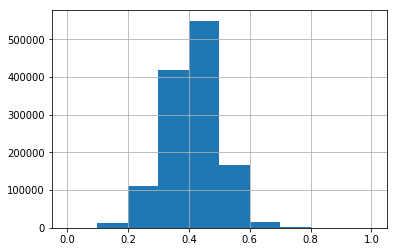

In [47]:
%matplotlib inline
df.F_FIRST_MESH.hist()

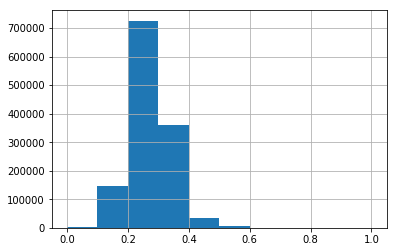

In [48]:
df.F_LAST_MESH.hist()